In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries & Helper Functions

In [5]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_images_from_path(path, label):
    images, labels = [], []
    for file in os.listdir(path):
        full_path = os.path.join(path, file)
        if os.path.isfile(full_path):
            try:
                img = image.load_img(full_path, target_size=(224, 224))
                images.append(image.img_to_array(img))
                labels.append(label)
            except:
                print(f"Error loading image: {file}")
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        ax.axis("off")


Load 5 Categories

Loading category: V22
Loading category: Tu160
Loading category: T50
Loading category: RQ4
Loading category: J10


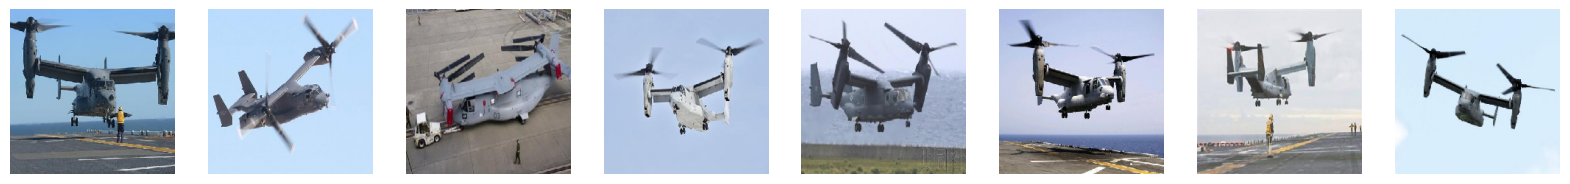

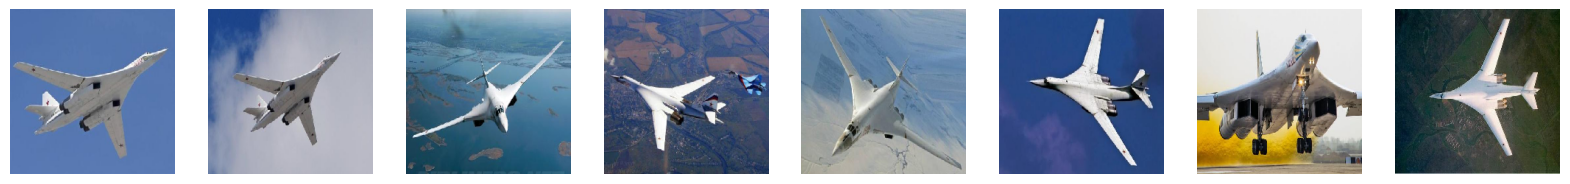

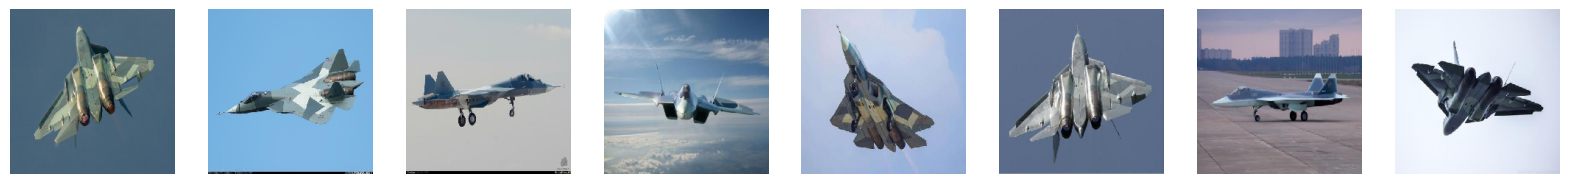

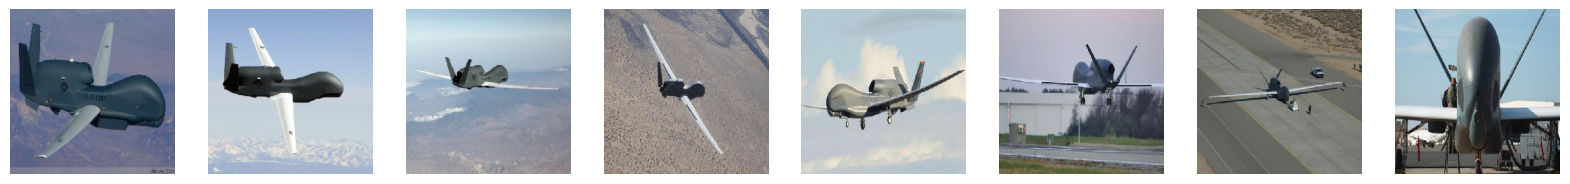

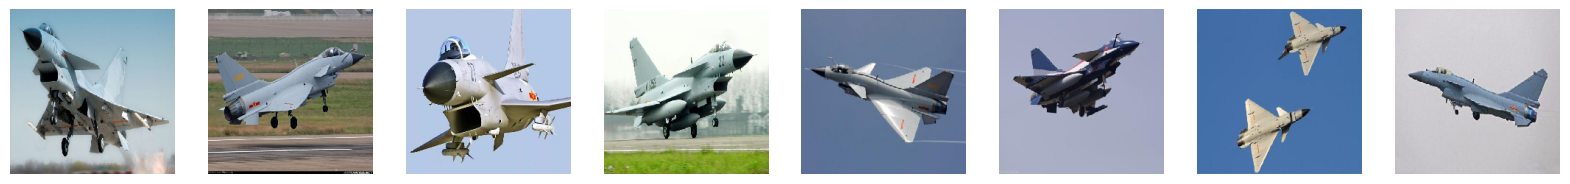

In [6]:
categories = ['V22', 'Tu160', 'T50', 'RQ4', 'J10']
base_path = '/content/drive/MyDrive/Fighter planes Dataset'

x_data, y_data = [], []

for idx, category in enumerate(categories):
    print(f"Loading category: {category}")
    images, labels = load_images_from_path(os.path.join(base_path, category), idx)
    show_images(images[:8])
    x_data += images
    y_data += labels

x_data = np.array(x_data) / 255.0
y_data_encoded = to_categorical(y_data, num_classes=len(categories))


Train/Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_encoded, test_size=0.2, random_state=42)


CNN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,398,661 (169.37 MB)

 Trainable params: 44,398,661 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.1479 - loss: 8.8937 - val_accuracy: 0.1250 - val_loss: 1.7161
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.2158 - loss: 1.6172 - val_accuracy: 0.1250 - val_loss: 1.6062
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3516 - loss: 1.5846 - val_accuracy: 0.1500 - val_loss: 1.6023
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.3975 - loss: 1.5006 - val_accuracy: 0.3750 - val_loss: 1.5671
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5093 - loss: 1.4350 - val_accuracy: 0.1750 - val_loss: 1.6410
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.6141 - loss: 1.1532 - val_accuracy: 0.4500 - val_loss: 1.6217
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.6396 - loss: 0.9588 - val_accuracy: 0.2750 - val_loss: 1.7740
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.7936 - loss: 0.6530 - val_accuracy: 0.3750 - val_loss: 1.9433
Epoch 9/

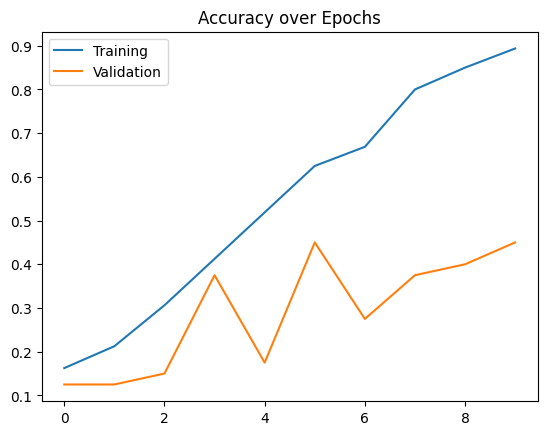

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Plot Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()


Save the Model

In [10]:
model.save("/content/drive/MyDrive/model.h5")


Deploy with FastAPI

In [ ]:
!pip install fastapi uvicorn pyngrok nest_asyncio python-multipart

import nest_asyncio
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import FileResponse
from pyngrok import ngrok
from tensorflow.keras.models import load_model

nest_asyncio.apply()

# Set up variables
FILE_PATH = "/content/drive/MyDrive/Train_Dataset"
MODEL_PATH = "/content/drive/MyDrive/model.h5"
model = load_model(MODEL_PATH)
app = FastAPI()

@app.get("/")
def root():
    return {"message": "Welcome to the Plane Classifier API"}

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    img = image.load_img(file.file, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    return {"prediction": categories[class_idx]}

@app.get("/download-file/")
async def download_file(filename: str):
    file_to_download = os.path.join(FILE_PATH, filename)
    if os.path.exists(file_to_download):
        return FileResponse(file_to_download, media_type='application/octet-stream', filename=filename)
    else:
        return {"error": "File not found"}

# Ngrok
ngrok.set_auth_token("2xzIMazNUMyptnkKq84dbMmJvjQ_3HZWXdSjAehkAzAVvquam")  # Replace with your actual token
public_url = ngrok.connect(8000)
print(f"FastAPI app is live at: {public_url}")

# Start server
import uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)


INFO:     Started server process [437]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


FastAPI app is live at: NgrokTunnel: "https://cf35-34-106-89-229.ngrok-free.app" -> "http://localhost:8000"
INFO:     2409:40e4:10a0:e09a:ed5a:7a73:ec0c:7da:0 - "GET / HTTP/1.1" 200 OK
INFO:     2409:40e4:10a0:e09a:ed5a:7a73:ec0c:7da:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     2409:40e4:10a0:e09a:ed5a:7a73:ec0c:7da:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2409:40e4:10a0:e09a:ed5a:7a73:ec0c:7da:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     2409:40e4:10a0:e09a:ed5a:7a73:ec0c:7da:0 - "POST /predict/ HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.11/dist-packages/starlette/applications.py", line 112, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.11/dist-packages/starlette/middleware/errors.py", line 187, in __call__
    raise exc
  File "/usr/local/lib/python3.11/dist-packages/starlette/middleware/errors.py",